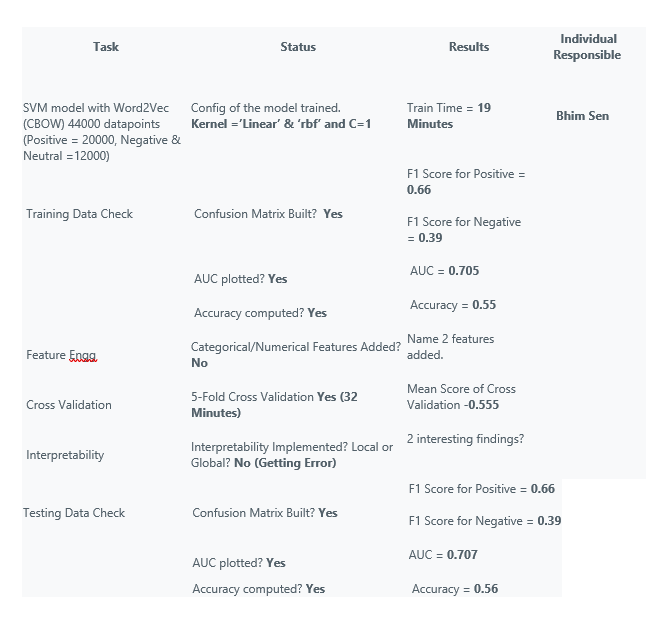

#Two SVM Models are created with Kernel='Linear'and 'rbf' and word embedding  word2Vec with 100 features
#Cross Validation is performed on 2nd Model

In [ ]:
#Mounting the google drive for data
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/Data/assignment3_NLP/Sentiment_Data.zip

Archive:  /content/drive/MyDrive/Data/assignment3_NLP/Sentiment_Data.zip
  inflating: Sentiment_Data.csv      


Importing the library

In [ ]:
import os
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score
import numpy as np
import spacy
import random
import pickle
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report
import pandas as pd
from sklearn import svm
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("Sentiment_Data.csv",encoding='ISO-8859-1')

This method
- Calculate the accuracy on test, train data.
- Calculate the Precision, Recall on test and train
- Calculate the AUC for test and train.


In [ ]:
def metrices(model,X_train_word2vec,X_test_word2vec,y_train,y_test):
  # Make predictions on the test set
  y_pred = model.predict(X_test_word2vec)

  # Evaluate the model's accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Test Accuracy:", accuracy)

  # Calculate confusion matrix
  confusion_mat = confusion_matrix(y_test, y_pred)
  print("Test Confusion Matrix")
  print(confusion_mat)

  #Classification Report
  report = classification_report(y_test,y_pred)
  print("Test Data Classification Report")
  print(report)

  # Calculate AUC
  y_porb = model.predict_proba(X_test_word2vec)
  auc = roc_auc_score(y_test, y_porb,multi_class="ovr")
  print("Test DataArea Under Cover")
  print(auc)

  # For each class, calculate ROC curve and AUC
  for i in range(len(model.classes_)):
      fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_porb[:, i])
      plt.plot(fpr, tpr, label=f"{model.classes_[i]} (AUC = {roc_auc_score(y_test == model.classes_[i], y_porb[:, i]):.2f})")

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve Test')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("-----------------------------------------")

  # Make predictions on the test set
  y_pred_t = model.predict(X_train_word2vec)

  accuracy_t = accuracy_score(y_train, y_pred_t)
  print("Train Accuracy:", accuracy_t)

  # Calculate confusion matrix
  confusion_mat = confusion_matrix(y_train, y_pred_t)
  print("Train Confusion Matrix")
  print(confusion_mat)

  #Classification Report
  report_t = classification_report(y_train,y_pred_t)
  print("Train Data Classification Report")
  print(report_t)

  # Calculate AUC
  y_porb_t = model.predict_proba(X_train_word2vec)
  auc_t = roc_auc_score(y_train, y_porb_t,multi_class="ovr")
  print("Train Data Area Under Cover")
  print(auc_t)

  # For each class, calculate ROC curve and AUC
  for i in range(len(model.classes_)):
      fpr, tpr, _ = roc_curve(y_train == model.classes_[i], y_porb_t[:, i])
      plt.plot(fpr, tpr, label=f"{model.classes_[i]} (AUC = {roc_auc_score(y_train == model.classes_[i], y_porb_t[:, i]):.2f})")

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve Train')
  plt.legend()
  plt.grid(True)
  plt.show()

##Removing the URLs

In [ ]:
#Removing the URL from the data using regular expression
def remove_URL(txt):
  url = re.compile(r'https?://\S+|www\.\S+')
  rmv_url = url.sub("",str(txt))
  return rmv_url

##Method for converting the sentence into tokens with stemming after removing stop words as well as special characters

In [ ]:
def tokenization(txt):
    # Initialize regex and stemmer
    regex = re.compile('[^a-zA-Z]')
    stemmer = PorterStemmer()

    # Preprocess the text data
    preprocessed_data = []

    document = regex.sub(' ', txt)
    # Tokenize the document into words
    words = nltk.word_tokenize(document)

    # Remove stop words and perform stemming
    processed_words = [word for word in words if word.lower() not in stopwords]

    return processed_words

##Lemmatizer Method

In [ ]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
#Lemmatization method
def lemma(text):
  # Perform lemmatization
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
  return lemmatized_tokens

##Vectorizer method which sum the vectors values of the Word2vec CBOW model

In [ ]:
def token_vectorizer(sentence):
  vec = []
  for word in sentence:
    if word in cbow_model.wv:
      x = sum(cbow_model.wv[word])/len(cbow_model.wv[word])
      vec.append(x)

  return vec




    # # Get word vectors
    # vectors = [cbow_model.wv[word] for word in sentence if word in cbow_model.wv]

    # # Average the word vectors to get the document vector
    # doc_vector = sum(vectors) / len(vectors) if vectors else None

    # return doc_vector

In [ ]:
#Calling the remove_URL function
df['Tweet'] = df['Tweet'].apply(remove_URL)

In [ ]:
#Calling the tokenizer method
df['tokens'] = df['Tweet'].apply(tokenization)

In [ ]:
df.head()

,Tweet,Sentiment,tokens
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos,"[angelica, toy, Happy, Anniversary, Day, FreeD..."
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos,"[McfarlaneGlenda, Happy, Anniversary, Day, Fre..."
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos,"[thevivafrei, JustinTrudeau, Happy, Anniversar..."
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos,"[NChartierET, Happy, Anniversary, Day, FreeDUM..."
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos,"[tabithapeters, Happy, Anniversary, Day, FreeD..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Data/assignment3_NLP/tokenizedDataframe", sep=',', index=False, encoding='utf-8')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/assignment3_NLP/tokenizedDataframe",encoding='ISO-8859-1')

#SVM Model with positive, negative and neutral tweets where each class hai 20000, 12000, 12000 datapoints respectively.

- Model 3.1 SVM Model With Kernel = RBF
- Model 3.2 SVM Model with Kernel = Linear

In [ ]:
str_pos = df[df['Sentiment'].str.contains('Strong_Pos')].sample(n=20000, random_state=42)
str_neg = df[df['Sentiment'].str.contains('Strong_Neg')].sample(n=12000, random_state=42)
neu = df[df['Sentiment'].str.contains('Neutral')].sample(n=12000, random_state=42)

In [ ]:
frames = [str_pos,str_neg,neu]
final_df = pd.concat(frames)

len(final_df)

44000

In [ ]:
final_df = final_df.sample(frac=1, random_state=42)
final_df.isnull().sum()
final_df2 = final_df.dropna()

###Encoding the Sentiments with LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df2['label']= le.fit_transform(final_df2['Sentiment'])

In [ ]:
# Display the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:")
print(label_mapping)

Label mapping:
{'Neutral': 0, 'Strong_Neg': 1, 'Strong_Pos': 2}


##Splitting the Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df2['tokens'], final_df2['label'], random_state = 5, test_size = 0.3,stratify=final_df2['label'])

##Loading the CBOW word2vec model with 100 features on Train Data

In [ ]:
from gensim.models import Word2Vec
cbow_model = Word2Vec(sentences=x_train, vector_size=100, window=5, sg=0, min_count=1, workers=4)

In [ ]:
for i in x_train:
  x = i
  print(i)
  break

['OttawaPolice', 'CrimeStoppersOT', 'hope', 'decent', 'respectful', 'protesters', 'convoy', 'right', 'thing', 'turn', 'two', 'criminals', 'PLACE', 'KIND', 'BEHAVIOUR', 'GIVE', 'PROTEST', 'BAD', 'LOOK', 'FreedomConvoy', 'FreedomConvoyCa']


In [ ]:
train = token_vectorizer(x)
print(train)

[0.019861280732002343, 0.0005938468077511061, 0.015773844621144235, 0.0001805178685754072, 0.0048604025412350895, 0.16146486815065145, 0.08578583208844065, 0.12333308429457247, 0.04294807214289904, 0.015905072814784944, 0.03183134472259553, 0.00973764025606215, -0.0009133916674181819, -0.0013968303056753938, -0.00020765452449268197, 0.0012569358677137644, -0.0026152247010031715, -0.0017359742880944395, -0.0004165635260869749, 0.0007620221469551325, -0.0010515466882498005]


In [ ]:
train_vectors = x_train.apply(token_vectorizer)
test_vectors = x_test.apply(token_vectorizer)

In [ ]:
X_train_word2vec = np.vstack(train_vectors)
X_test_word2vec = np.vstack(test_vectors)

#SVM Model 3.1 with kernel = 'rbf'

In [ ]:
from sklearn.svm import SVC
# Create and train SVM model
svm_model_3 = SVC(probability=True,kernel='rbf')

In [ ]:
svm_model_3.fit(X_train_word2vec,y_train)

SVC(probability=True)

In [ ]:
metrices(svm_model_3,X_train_word2vec,X_test_word2vec,y_train,y_test)

Test Accuracy: 0.5453787878787879
Test Confusion Matrix
[[ 781  567 2252]
 [  72 1151 2377]
 [ 139  594 5267]]
Test Data Classification Report
              precision    recall  f1-score   support

           0       0.79      0.22      0.34      3600
           1       0.50      0.32      0.39      3600
           2       0.53      0.88      0.66      6000

    accuracy                           0.55     13200
   macro avg       0.61      0.47      0.46     13200
weighted avg       0.59      0.55      0.50     13200

Test DataArea Under Cover
0.7076891859567901
-----------------------------------------
Train Accuracy: 0.545814663289824
Train Confusion Matrix
[[ 1860  1332  5206]
 [  168  2698  5534]
 [  305  1443 12252]]
Train Data Classification Report
              precision    recall  f1-score   support

           0       0.80      0.22      0.35      8398
           1       0.49      0.32      0.39      8400
           2       0.53      0.88      0.66     14000

    accuracy     

#SVM Model 3.2 with kernel = 'Linear'

In [ ]:
from sklearn.svm import SVC
# Create and train SVM model
svm_model_4 = SVC(probability=True,kernel='linear')

In [ ]:
svm_model_4.fit(X_train_word2vec,y_train)

SVC(kernel='linear', probability=True)

Test Accuracy: 0.5615909090909091
Test Confusion Matrix
[[ 968  732 1900]
 [ 163 1551 1886]
 [ 186  920 4894]]
Test Data Classification Report
              precision    recall  f1-score   support

           0       0.74      0.27      0.39      3600
           1       0.48      0.43      0.46      3600
           2       0.56      0.82      0.67      6000

    accuracy                           0.56     13200
   macro avg       0.59      0.51      0.51     13200
weighted avg       0.59      0.56      0.53     13200

Test DataArea Under Cover
0.709306444830247


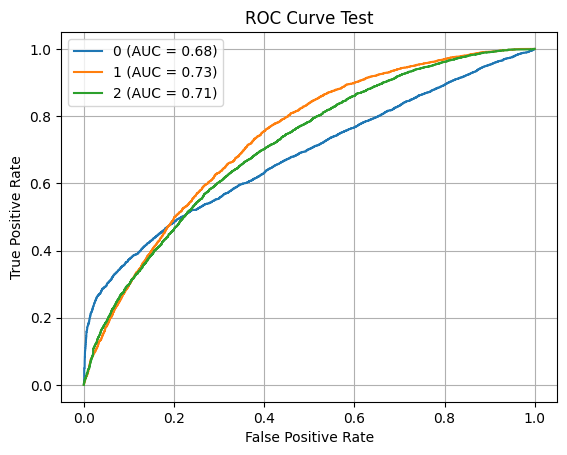

-----------------------------------------
Train Accuracy: 0.5606532891746218
Train Confusion Matrix
[[ 2249  1738  4411]
 [  312  3581  4507]
 [  419  2144 11437]]
Train Data Classification Report
              precision    recall  f1-score   support

           0       0.75      0.27      0.40      8398
           1       0.48      0.43      0.45      8400
           2       0.56      0.82      0.67     14000

    accuracy                           0.56     30798
   macro avg       0.60      0.50      0.50     30798
weighted avg       0.59      0.56      0.53     30798

Train Data Area Under Cover
0.7075884024377785


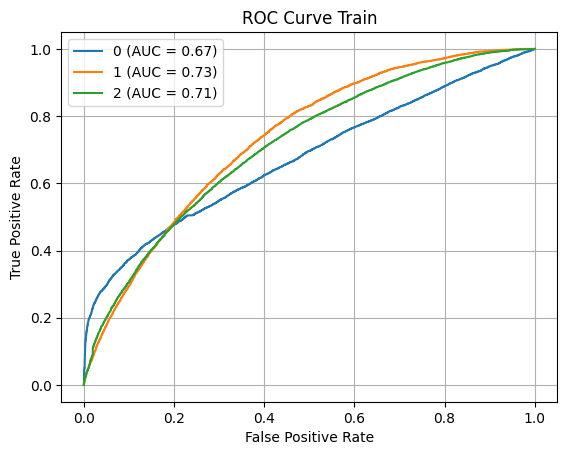

In [ ]:
metrices(svm_model_4,X_train_word2vec,X_test_word2vec,y_train,y_test)

#k-Fold Cross Validation with K = 5

In [ ]:
scores = cross_val_score(svm_model_4, X_train_word2vec, y_train, cv=5)

In [ ]:
scores

array([0.55827922, 0.55584416, 0.56103896, 0.54943984, 0.5523624 ])

In [ ]:
print("Mean Score Of 5-Fold Cross Validation:- ",scores.mean())

Mean Score Of 5-Fold Cross Validation:-  0.5553929156571631


In [ ]:
%%shell
jupyter nbconvert --to html "/content/NLP_3_Assignment_copy (1).ipynb"

[NbConvertApp] Converting notebook /content/NLP_3_Assignment_copy (1).ipynb to html
[NbConvertApp] Writing 805793 bytes to /content/NLP_3_Assignment_copy (1).html
